<a href="https://colab.research.google.com/github/george-zakharov/ml_notebooks/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework 8



#### Light: 

Датасет: https://www.kaggle.com/c/stumbleupon

Решить NLP задачу и использованием стандартных представлений документов (BOW, Tf-Idf).


#### Pro: 

Датасет: https://www.kaggle.com/c/stumbleupon

Решить задачу классификации с использованием текста страницы и других параметров. Протестировать разные способы представления данных. Использовать различные подходы к обработке векторных представлений текстов (PCA, feature Selection). 


# Load libs

In [61]:
import pandas as pd

import re

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Get train dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML/8/stumbleupon/train.tsv", sep ='\t')

# Dataset exploration

In [4]:
df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
url                               7395 non-null object
urlid                             7395 non-null int64
boilerplate                       7395 non-null object
alchemy_category                  7395 non-null object
alchemy_category_score            7395 non-null object
avglinksize                       7395 non-null float64
commonlinkratio_1                 7395 non-null float64
commonlinkratio_2                 7395 non-null float64
commonlinkratio_3                 7395 non-null float64
commonlinkratio_4                 7395 non-null float64
compression_ratio                 7395 non-null float64
embed_ratio                       7395 non-null float64
framebased                        7395 non-null int64
frameTagRatio                     7395 non-null float64
hasDomainLink                     7395 non-null int64
html_ratio                        7395 non-null float64
image_r

In [6]:
df.describe()

,urlid,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,lengthyLinkDomain,linkwordscore,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.0,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,5305.704665,2.761823,0.468230,0.214080,0.092062,0.049262,2.255103,-0.103750,0.0,0.056423,0.021231,0.233778,0.275709,0.660311,30.077079,5716.598242,178.754564,4.960649,0.172864,0.101221,0.513320
std,3048.384114,8.619793,0.203133,0.146743,0.095978,0.072629,5.704313,0.306545,0.0,0.041446,0.144162,0.052487,1.919320,0.473636,20.393101,8875.432430,179.466198,3.233111,0.183286,0.079231,0.499856
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2688.500000,1.602062,0.340370,0.105263,0.022222,0.000000,0.442616,0.000000,0.0,0.028502,0.000000,0.201061,0.025900,0.000000,14.000000,1579.000000,82.000000,3.000000,0.040984,0.068739,0.000000
50%,5304.000000,2.088235,0.481481,0.202454,0.068627,0.022222,0.483680,0.000000,0.0,0.045775,0.000000,0.230564,0.083051,1.000000,25.000000,3500.000000,139.000000,5.000000,0.113402,0.089312,1.000000
75%,7946.500000,2.627451,0.616604,0.300000,0.133333,0.065065,0.578227,0.000000,0.0,0.073459,0.000000,0.260770,0.236700,1.000000,43.000000,6377.000000,222.000000,7.000000,0.241299,0.112376,1.000000
max,10566.000000,363.000000,1.000000,1.000000,0.980392,0.980392,21.000000,0.250000,0.0,0.444444,1.000000,0.716883,113.333333,1.000000,100.000000,207952.000000,4997.000000,22.000000,1.000000,1.000000,1.000000


In [13]:
df.boilerplate.loc[0]

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

# Light

## User defined functions

In [0]:
def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def text_preprocess(text):    
    reg = re.compile('[^а-яёА-ЯЁa-zA-Z0-9]')
    text = text.lower()
    text = reg.sub(' ', text)
    lemmatizer = WordNetLemmatizer()
    text_ = ''
    for word in text.split():
        text_ = text_+ ' ' + lemmatizer.lemmatize(word)

    return text_

## Extract train data

In [0]:
df_short = df[['boilerplate', 'label']]

In [20]:
df_short.head()

,boilerplate,label
0,"{""title"":""IBM Sees Holographic Calls Air Breat...",0
1,"{""title"":""The Fully Electronic Futuristic Star...",1
2,"{""title"":""Fruits that Fight the Flu fruits tha...",1
3,"{""title"":""10 Foolproof Tips for Better Sleep ""...",1
4,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",0


In [27]:
df_short['boilerplate'] = df_short['boilerplate'].apply(text_preprocess)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_short.head()

,boilerplate,label
0,title ibm see holographic call air breathing ...,0
1,title the fully electronic futuristic startin...,1
2,title fruit that fight the flu fruit that fig...,1
3,title 10 foolproof tip for better sleep body ...,1
4,title the 50 coolest jersey you didn t know e...,0


In [0]:
X = df_short['boilerplate']
y = df_short['label']

## Test train data

In [0]:
# Get vectorizers
bow_vec = CountVectorizer() # BOW
tfidf_vec = TfidfVectorizer() # TF-IDF 

In [0]:
# Get word matrixes
X_bow = bow_vec.fit_transform(X)
X_tfidf = tfidf_vec.fit_transform(X)

In [0]:
# Prepare dict for further training
data_dict = {'BOW': X_bow, 'IF-IDF': X_tfidf}

Обработка с помощью - BOW

Accuracy:  0.8052738336713996
Recall:  0.7209612817089452
Precision:  0.8723747980613893
F1:  0.7894736842105262
Roc_AUC:  0.8063710518133768


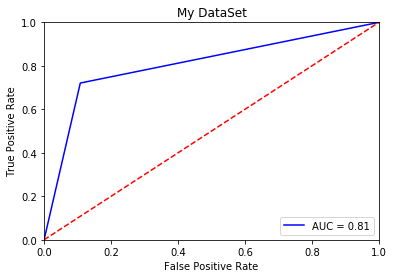




Обработка с помощью - IF-IDF

Accuracy:  0.8059499661933739
Recall:  0.8264352469959947
Precision:  0.7976804123711341
F1:  0.8118032786885246
Roc_AUC:  0.8056833769226549


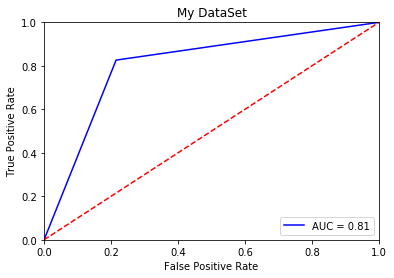

In [64]:
# Train Bayes classifier with BOW and TF-IDF
for method_name, X_vec in data_dict.items():
  print("Use word vectors on - " + method_name + "\n")
  X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size = 0.2, random_state = 42)

  clf = MultinomialNB()
  clf.fit(X_train,y_train)
  clf.score(X_test,y_test)
  y_pred = clf.predict(X_test)

  value_of_metrics(y_test, y_pred)
  print("\n\n")

# Useful tool

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
 
 
texts = ['текст номер один', 'текст номер два', 'комьютеры в лингвистике', 'компьютеры и обработка текстов']
texts_labels = [1, 1, 0, 0]
 
text_clf = Pipeline([
                     ('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier())
                     ])
 
text_clf.fit(texts, texts_labels)
 
res = text_clf.predict(['текст номер три'])
print(res)  # [1]

[1]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
report = classification_report(y_test, lr.predict(X_test), target_names=['Non-churned', 'Churned'])
print(report)

# Useful liks

* http://zabaykin.ru/?p=558


```
Список улучшений, которые следует попробовать.
1. предобработка текста. Попробуйте нормализовать слова, тогда одно смысловое слово в разных склонениях/спряжениях будет интерпретироваться программой одинаково и возможно поднимет качество.
2. У TfIdf есть много разных параметров, наиболее существенные это
2.1 добавить список стоп слов: параметр stop_words
2.2 добавить n-gramm ы слов : параметр ngram_range, например ngram_range=(1,2)
2.3 ограничить список фич, взяв только самые важные и отрезав менее важные: параметр max_features
3. попробовать другой классификатор, например from sklearn.linear_model import SGDClassifier или SVM , XGB итд. соответсвенно подбирая в каждом из них свои гиперпараметры
```

* http://nlpx.net/archives/29
* http://nlpx.net/archives/57
* https://habr.com/ru/company/ods/blog/328372/
